## **How the Algorithm Works**
K-Means is an **unsupervised learning algorithm** used for clustering data into **K distinct groups** based on similarity.

### **Key Steps:**
1. **Initialize K Centroids:**  
   Randomly select **K points** as the initial cluster centroids.
   
2. **Assign Points to Clusters:**  
   Each data point is assigned to the nearest centroid using **Euclidean distance**:

   $$ d(x_i, c_k) = \sqrt{\sum_{j=1}^{n} (x_{ij} - c_{kj})^2} $$

   where:
   - \( x_i \) is the **data point**,
   - \( c_k \) is the **centroid of cluster k**, and
   - \( n \) is the number of features.

3. **Update Centroids:**  
   Compute the new centroid of each cluster as the **mean of all points assigned to it**:

   $$ c_k = \frac{1}{N_k} \sum_{i=1}^{N_k} x_i $$

   where:
   - \( N_k \) is the **number of points** in cluster \( k \).

4. **Repeat Steps 2 & 3** until centroids **do not change significantly** or reach a stopping condition.

---

## **Choosing the Right Number of Clusters (K)**
The **Elbow Method** is commonly used to determine the optimal value of \( K \):

- Compute the **Within-Cluster Sum of Squares (WCSS)**:

  $$ WCSS = \sum_{k=1}^{K} \sum_{i \in C_k} || x_i - c_k ||^2 $$

- Plot WCSS against \( K \). The point where the **rate of decrease slows** (elbow point) suggests the best \( K \).

---

## **Limitations**
- **Sensitive to initialization**: Poor centroid initialization may lead to suboptimal clusters.
- **Requires pre-defined K**: Choosing \( K \) manually can be challenging.
- **Not suitable for non-spherical clusters**: Assumes clusters are convex and isotropic.

---

## **Conclusion**
K-Means is a **fast and scalable** clustering algorithm suitable for many applications, such as:
- **Customer segmentation**
- **Anomaly detection**
- **Image compression**

By optimizing **centroid initialization** and using **methods like the Elbow technique**, we can improve clustering performance.


In [2]:
library(readr)
library(class)
library(gmodels)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
data <- read.csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

In [7]:
head(data)
x <- data[4:5]

,CustomerID,Gender,Age,Annual.Income..k..,Spending.Score..1.100.
,<int>,<chr>,<int>,<int>,<int>
1,1,Male,19,15,39
2,2,Male,21,15,81
3,3,Female,20,16,6
4,4,Female,23,16,77
5,5,Female,31,17,40
6,6,Female,22,17,76


In [5]:
set.seed(69)

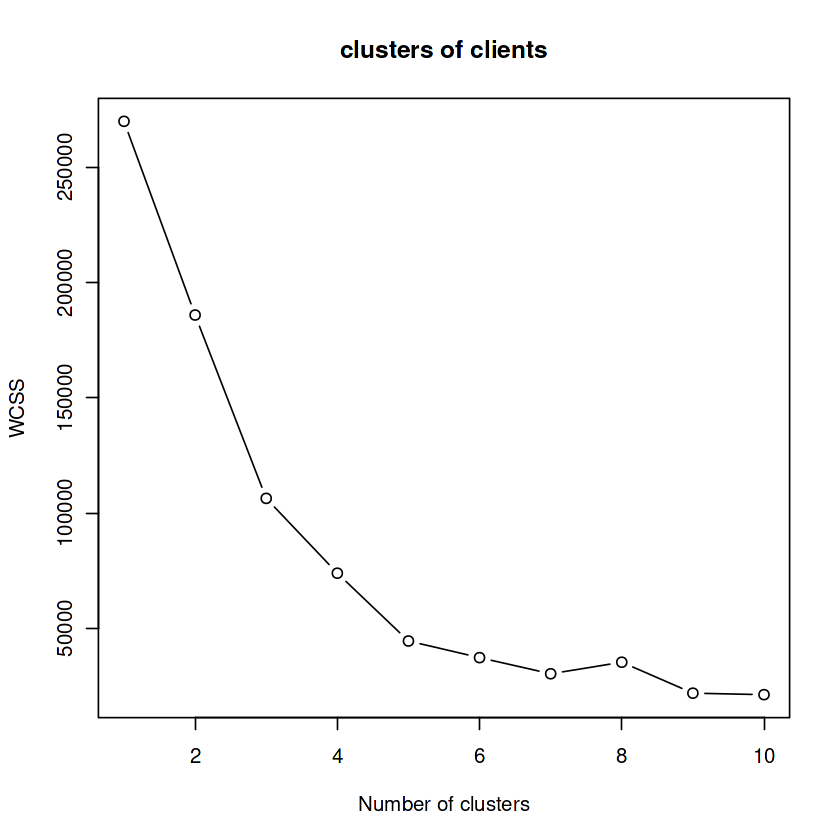

In [8]:
#to compute different cluster for  sum of squares  and for different number of clusters
wcss<-vector()
for (i in 1:10) wcss[i]<-sum(kmeans(x,i)$withinss)
#to plot the number of clusters and 
plot(1:10,wcss,type = "b",main = paste('clusters of clients'),xlab = "Number of clusters",ylab = "WCSS")

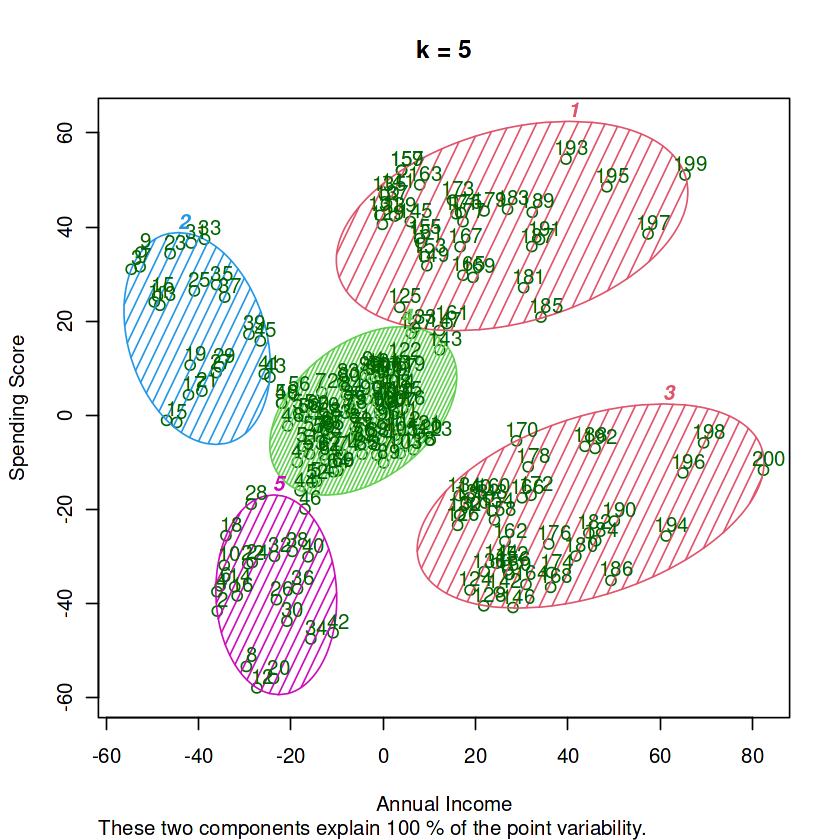

In [10]:
#for k = 5
kmeans<-kmeans(x,5,iter.max=300,nstart=10)

library(cluster)

clusplot(x, kmeans$cluster,
         lines = 0,
         shade = TRUE,
         color = TRUE,
         labels = 2,
         plotchar = FALSE,
         span = TRUE,
         main = paste('k = 5'),
         xlab = 'Annual Income',
         ylab = 'Spending Score')

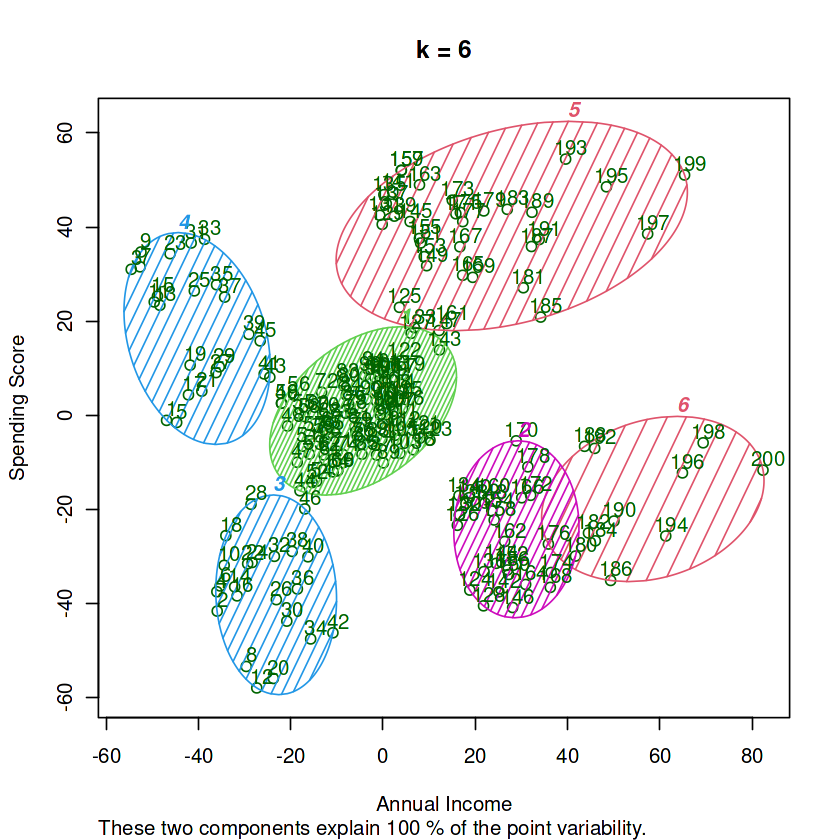

In [11]:
#for k = 6
kmeans<-kmeans(x,6,iter.max=300,nstart=10)

clusplot(x, kmeans$cluster,
         lines = 0,
         shade = TRUE,
         color = TRUE,
         labels = 2,
         plotchar = FALSE,
         span = TRUE,
         main = paste('k = 6'),
         xlab = 'Annual Income',
         ylab = 'Spending Score')